# Probe Design Tutorial

This notebook demonstrates the complete workflow for designing probes using the `probepy` module. The functions covered here build upon the data preparation demonstrated in `prep_tutorial.ipynb` to design specific, high-quality probes for target genes.

## Overview

The HCR-FISH probe design workflow consists of several key steps:

1. **Check probe availability** - Determine how many probes can be designed for a gene
2. **BLAST analysis** - Identify off-target binding sites to ensure specificity
3. **Probe design** - Generate probe sequences compatible with HCR v3.0 amplification
4. **Export for synthesis** - Create IDT-compatible files for probe ordering
5. **Visualization** - Plot probe binding sites on genomic features

## Requirements

Before running this tutorial, ensure you have:
- Completed the data preparation from `prep_tutorial.ipynb`
- BLAST+ tools installed and available in your PATH
- Transcriptome objects created for your species of interest
- BLAST databases for both mature mRNA (no introns) and pre-mRNA (with introns)

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import probepy

## Setup and Configuration

First, let's verify that BLAST tools are available and set up our working directories.

In [2]:
probepy.check_blast_tools()

[OK] makeblastdb: makeblastdb: 2.15.0+
[OK] blastn: blastn: 2.15.0+


{'makeblastdb': {'available': True, 'version': 'makeblastdb: 2.15.0+'},
 'blastn': {'available': True, 'version': 'blastn: 2.15.0+'}}

In [3]:
# Configuration parameters
species_identifier = "obir"  # Change this to your species
base_directory = "../"
# Target genes for demonstration
target_gene = "Or5-9E306"

# HCR amplifier to use (B1, B2, B3, B4, or B5)
amplifier = "B1"

print(f"Going to design probes for gene {target_gene} using amplifier {amplifier} in species {species_identifier}")

Going to design probes for gene Or5-9E306 using amplifier B1 in species obir


## Load Transcriptome Data

Load the transcriptome object that was created in the preparation tutorial.

In [4]:
# Load the transcriptome object
transcriptome = probepy.load_transcriptome_object(species_identifier, base_dir=base_directory)
print(f"Loaded transcriptome with {len(transcriptome.genes)} genes")

Loaded transcriptome object from ../input/obir/obir_transcriptome.pkl
Loaded transcriptome with 14153 genes


## Step 1: Assign Target Sequence

First, we need to assign the target sequence for probe design. We can specify whether to target the pre-mRNA or the mature mRNA. We are going to use the default settings, which uses the mature mRNA and the transcript isoform with the longest coding sequence. 

In [5]:
probepy.assign_target(
    target_gene, 
    transcriptome,
)

Assigned mRNA sequence for gene 'Or5-9E306' from transcript 'XM_026973037.1' with length 1830 bp.


## Step 2: Check Probe Availability

Before designing probes for a gene, it's useful to check how many probes can be generated. This function performs the complete analysis pipeline and returns the number of available probes.

In [6]:
# Check probe availability (this performs BLAST analysis)
n_probes = probepy.check_probe_availability(
    target_gene,
    transcriptome,
    species_identifier,
    base_dir=base_directory,
)

Running BLAST analysis for Or5-9E306...
[OK] makeblastdb: makeblastdb: 2.15.0+
[OK] blastn: blastn: 2.15.0+
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_no_introns.csv
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_yes_introns.csv
BLAST searches completed for Or5-9E306. Results saved to ../output/obir/gene_seq_blast_output
Unique regions have been annotated and exported to ../output/obir/gene_seq_unique_regions
Masked 8 off-target regions from Or5-9E306
Designing HCR-FISH probes for Or5-9E306...
Number of available probes for Or5-9E306: 26


## Step 3: Design Probes for IDT 

Now that we know there is space, let's design probes using our amplifier and export an excel sheet for IDT. 

In [7]:
probepy.get_probes_IDT(
    target_gene,
    transcriptome,
    amplifier=amplifier,
    species_identifier=species_identifier,
    base_dir=base_directory,
)

26 probes designed for Or5-9E306 using amplifier B1
Using all 26 available probes for Or5-9E306
Exported 52 probe sequences to ../output/obir/IDT_sheets/Or5-9E306-B1-2025-10-30.xlsx
Exported probe binding regions to ../output/obir/probe_binding_regions_sheets/Or5-9E306-B1-regions-2025-10-30.xlsx


### Access IDT Sheet

The function saves an excel file that can be directly uploaded to IDT oPools for ordering. 

In [8]:
idt_path = '../output/obir/IDT_sheets/Or5-9E306-B1-2025-10-30.xlsx'
idt_df = pd.read_excel(idt_path)
idt_df.head()

,Pool name,Sequence
0,Or5-9E306-B1,GAGGAGGGCAGCAAACGGaaAACAATAAAGACCGCACTAATTCTA
1,Or5-9E306-B1,TGGTATTACACATCGTTATCGCATAtaGAAGAGTCTTCCTTTACG
2,Or5-9E306-B1,GAGGAGGGCAGCAAACGGaaATGTACACAAGATCTACAATCTACA
3,Or5-9E306-B1,TAATTCAGTTTCAGTGATGTTTGAGtaGAAGAGTCTTCCTTTACG
4,Or5-9E306-B1,GAGGAGGGCAGCAAACGGaaCGCAATACTGACGCAATATTCCATT


### Access Probe-binding Regions 

The function also saves an excel file with a row for each probe pair, and includes the probe-binding region and both probe pair sequences. 

In [9]:
idt_path = '../output/obir/probe_binding_regions_sheets/Or5-9E306-B1-regions-2025-10-30.xlsx'
regions_df = pd.read_excel(idt_path)
regions_df.head()

,Gene,Region,Probe 1,Probe 2
0,Or5-9E306,TAGAATTAGTGCGGTCTTTATTGTTTTTATGCGATAACGATGTGTA...,GAGGAGGGCAGCAAACGGaaAACAATAAAGACCGCACTAATTCTA,TGGTATTACACATCGTTATCGCATAtaGAAGAGTCTTCCTTTACG
1,Or5-9E306,TGTAGATTGTAGATCTTGTGTACATTGCTCAAACATCACTGAAACT...,GAGGAGGGCAGCAAACGGaaATGTACACAAGATCTACAATCTACA,TAATTCAGTTTCAGTGATGTTTGAGtaGAAGAGTCTTCCTTTACG
2,Or5-9E306,AATGGAATATTGCGTCAGTATTGCGCTTGCGTTGCACTCAACATCG...,GAGGAGGGCAGCAAACGGaaCGCAATACTGACGCAATATTCCATT,TTCTGCCGATGTTGAGTGCAACGCAtaGAAGAGTCTTCCTTTACG
3,Or5-9E306,TTTAAAACTATTTAGCTCAACACGAGAAATTATATAATTCCCGCAA...,GAGGAGGGCAGCAAACGGaaTCGTGTTGAGCTAAATAGTTTTAAA,GACTATTTGCGGGAATTATATAATTtaGAAGAGTCTTCCTTTACG
4,Or5-9E306,ATTTTCATAATTCGATAGATCGATCGGCGAGCAAATTATTCTCTAT...,GAGGAGGGCAGCAAACGGaaGATCGATCTATCGAATTATGAAAAT,AAGGTAATAGAGAATAATTTGCTCGtaGAAGAGTCTTCCTTTACG


## Step 4: Visualize Probe Binding Sites

Finally, let's create a genomic visualization showing where the probes will bind relative to the gene structure. You can specify whether to save the file or not. 

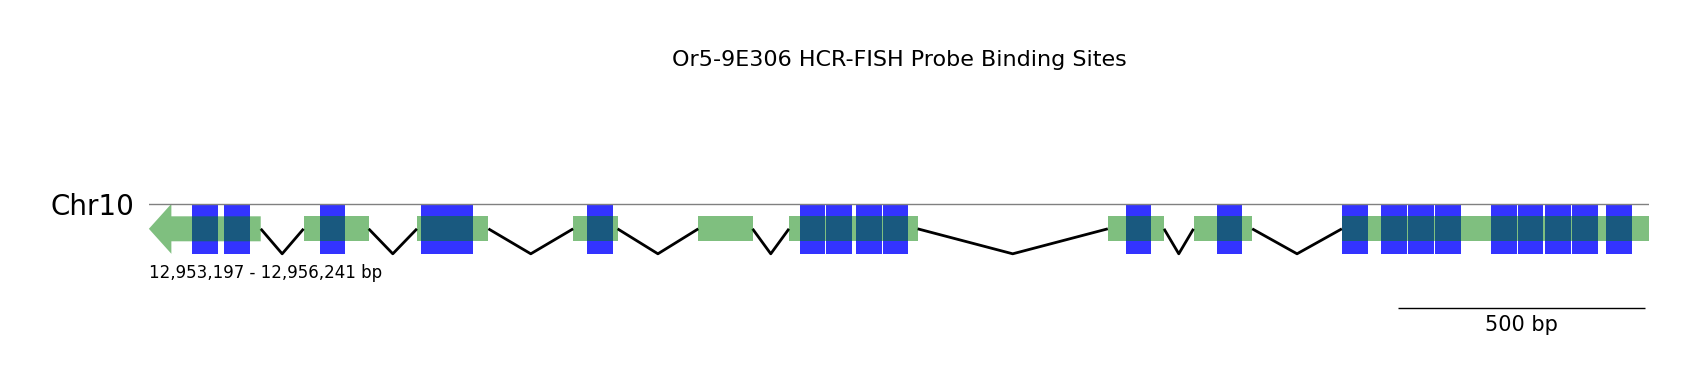

In [10]:
fig = probepy.get_probe_binding_regions_plot(
    target_gene,
    transcriptome,
    base_dir=base_directory,
    species_identifier=species_identifier,
    save=False 
)

### Advanced Topic: Read BLAST Results
If you want, you can load the blast results directly from the gene object.

In [11]:
transcriptome.get_gene(target_gene).blast_results.head()

,query_id,subject_id,subject_acc,percent_identity,length,mismatches,gap_opens,q_start,q_end,s_start,s_end,evalue,bitscore,source,subject_gene_id,same_gene,permitted_off_target
0,Or5-9E306,ref|XM_026973037.1|,XM_026973037,100.0,1830,0,0,1,1830,1,1830,0.0,3658.0,no_introns,Or5-9E306,True,False
1,Or5-9E306,ref|XM_026973038.1|,XM_026973038,100.0,1469,0,0,1,1469,1,1469,0.0,2936.0,no_introns,Or5-9E306,True,False
2,Or5-9E306,ref|XM_026973038.1|,XM_026973038,100.0,338,0,0,1493,1830,1470,1807,0.0,676.0,no_introns,Or5-9E306,True,False
3,Or5-9E306,ref|XM_026973039.1|,XM_026973039,100.0,1087,0,0,744,1830,708,1794,0.0,2173.0,no_introns,Or5-9E306,True,False
4,Or5-9E306,ref|XM_026973039.1|,XM_026973039,100.0,713,0,0,1,713,1,713,0.0,1425.0,no_introns,Or5-9E306,True,False


You can also load the dataframe containing the off-target hits from the blast analysis.

In [12]:
transcriptome.get_gene(target_gene).off_targets.head()

,query_id,subject_id,subject_acc,percent_identity,length,mismatches,gap_opens,q_start,q_end,s_start,s_end,evalue,bitscore,source,subject_gene_id,same_gene,permitted_off_target
5,Or5-9E306,ref|XM_026972993.1|,XM_026972993,92.035,113,9,0,1129,1241,608,720,4.160000e-25,118.0,no_introns,Or5-9E308,False,False
6,Or5-9E306,ref|XM_026972992.1|,XM_026972992,92.035,113,9,0,1129,1241,674,786,4.160000e-25,118.0,no_introns,Or5-9E308,False,False
7,Or5-9E306,ref|XM_026972991.1|,XM_026972991,92.035,113,9,0,1129,1241,674,786,4.160000e-25,118.0,no_introns,Or5-9E308,False,False
8,Or5-9E306,ref|XM_011350179.3|,XM_011350179,92.035,113,9,0,1129,1241,674,786,4.160000e-25,118.0,no_introns,Or5-9E308,False,False
36,Or5-9E306,ref|XM_026972993.1|,XM_026972993,93.000,100,7,0,1129,1228,1457,1556,8.730000e-24,116.0,yes_introns,Or5-9E308,False,False


### Advanced Topic: Allow Off-Targets

If the gene is not unique enough because it is similar in sequence to other genes, you can specify a list of allowed off-targets to increase the number of probes. Here we allow off-target binding to another gene, "Or5-9E308" and the number of probe pairs increases from 26 to 28. 

In [13]:
# Check probe availability (this performs BLAST analysis)
n_probes = probepy.check_probe_availability(
    target_gene,
    transcriptome,
    species_identifier,
    base_dir=base_directory,
)

Running BLAST analysis for Or5-9E306...
[OK] makeblastdb: makeblastdb: 2.15.0+
[OK] blastn: blastn: 2.15.0+
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_no_introns.csv
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_yes_introns.csv
BLAST searches completed for Or5-9E306. Results saved to ../output/obir/gene_seq_blast_output
Unique regions have been annotated and exported to ../output/obir/gene_seq_unique_regions
Masked 8 off-target regions from Or5-9E306
Designing HCR-FISH probes for Or5-9E306...
Number of available probes for Or5-9E306: 26


In [14]:
# Check probe availability (this performs BLAST analysis)
n_probes = probepy.check_probe_availability(
    target_gene,
    transcriptome,
    species_identifier,
    base_dir=base_directory,
    permitted_off_targets=['Or5-9E308']
)

Running BLAST analysis for Or5-9E306...
[OK] makeblastdb: makeblastdb: 2.15.0+
[OK] blastn: blastn: 2.15.0+
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_no_introns.csv
[OK] BLAST results saved to: ../output/obir/gene_seq_blast_output/Or5-9E306_blasted_yes_introns.csv
BLAST searches completed for Or5-9E306. Results saved to ../output/obir/gene_seq_blast_output
Unique regions have been annotated and exported to ../output/obir/gene_seq_unique_regions
Masked 0 off-target regions from Or5-9E306
Designing HCR-FISH probes for Or5-9E306...
Number of available probes for Or5-9E306: 28


### Directory Structure

In [15]:
! ls -R ../output/obir/

IDT_sheets                   gene_seq_unique_regions
gene_seq_blast_input         probe_binding_regions_sheets
gene_seq_blast_output

../output/obir/IDT_sheets:
Or5-9E117-B5-2025-10-26.xlsx Or5-9E306-B1-2025-10-30.xlsx
Or5-9E306-B1-2025-10-26.xlsx

../output/obir/gene_seq_blast_input:
Or5-9E306.fasta

../output/obir/gene_seq_blast_output:
Or5-9E306_blasted_no_introns.csv  Or5-9E306_blasted_yes_introns.csv

../output/obir/gene_seq_unique_regions:
Or5-9E306_unique.fasta

../output/obir/probe_binding_regions_sheets:
Or5-9E117-B5-regions-2025-10-26.xlsx Or5-9E306-B1-regions-2025-10-30.xlsx
Or5-9E306-B1-regions-2025-10-26.xlsx


## Best Practices and Troubleshooting

Here are some key recommendations for successful HCR-FISH probe design:

### Best Practices

1. **Target Selection**:
   - Choose genes that you know are expressed 
   - Be specific with which isoform you use as a target 

2. **Probe Design**:
   - Aim for 20-30 probe pairs per target for robust signal
   - Use different amplifiers (B1-B5) for multiplexed experiments
   - Check probe availability before committing to experimental design

3. **Quality Control**:
   - Always run BLAST analysis to check specificity
   - Review off-target hits manually for closely related genes

4. **File Management**:
   - Keep organized directory structure 
   - Save probe binding regions, probe lists and images 
   - Document amplifier assignments for multiplexed experiments

### Troubleshooting Common Issues

**Low probe availability (<10 probes)**:
- Check for repetitive sequences or gene family members
- Consider targeting specific splice variants
- Allow for off-target binding (with caution)

**BLAST analysis failures**:
- Verify BLAST+ installation and PATH configuration
- Check database file integrity and paths
- Ensure sufficient disk space for temporary files

**Visualization errors**:
- Confirm genome FASTA file exists 
- Check chromosome naming consistency between GTF and FASTA

**Poor probe performance in experiments**:
- Ensure high-quality genome and transcriptome annotations 
- Consider probe concentration optimization
- Check amplifier sequences and experimental protocols